In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd 
import datetime as dt
import pickle


In [3]:
stock = pd.read_csv('data-computo (1) (1) (1).csv')

In [4]:
stock.head()

,timestamp,stk_minimo,id,stk_proveedor
0,01/01/2016,14,1,38
1,01/01/2016,49,2,50
2,01/01/2016,39,3,39
3,01/01/2016,3,4,34
4,01/01/2016,14,5,19


In [5]:
stock.columns 
stock['timestamp'] = pd.to_datetime(stock['timestamp'])
stock['timestamp']=stock['timestamp'].map(dt.datetime.toordinal)


In [71]:
X = stock[['stk_minimo']]

In [65]:
Y = stock[['stk_proveedor']]    

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.6, random_state=12)

In [73]:
X_train

,stk_minimo
354190,4
69148,5
71834,49
294799,12
248325,6
...,...
36482,4
564465,41
412925,5
255366,11


In [53]:
Y_train

,stk_proveedor
354190,14
69148,23
71834,50
294799,34
248325,6
...,...
36482,11
564465,41
412925,11
255366,18


In [67]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression()

In [68]:
from sklearn import metrics

In [69]:
predicciones = lrm.predict(X_test)

In [59]:
predicciones

array([[26.],
       [45.],
       [49.],
       ...,
       [32.],
       [43.],
       [37.]])

In [70]:
X_test

,stk_minimo
338654,1
348852,43
163035,48
427279,6
282845,7
...,...
189704,31
468207,5
541950,28
48595,24


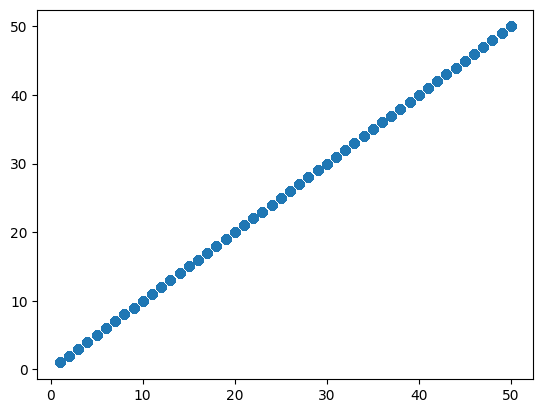

In [60]:
plt.scatter(Y_test, predicciones)

C:\Users\diego\AppData\Local\Temp\ipykernel_14972\1191984370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(Y_test - predicciones)


<Axes: ylabel='Density'>

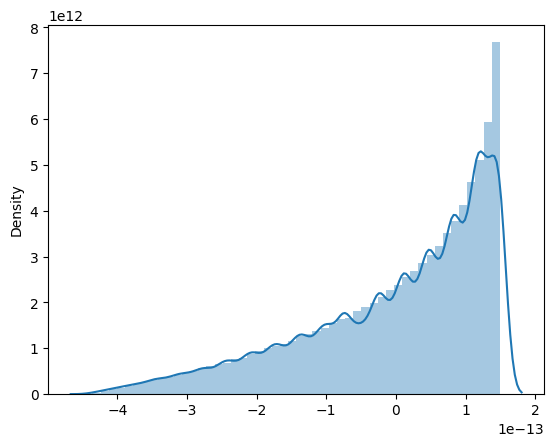

In [61]:
sn.distplot(Y_test - predicciones)

Media del valor absoluto de los errores

In [62]:
metrics.mean_absolute_error(Y_test, predicciones)

1.0889460109222334e-13

c:\Users\diego\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


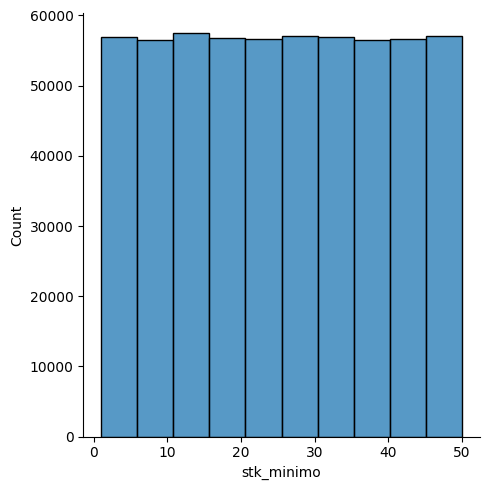

In [63]:
sn.displot(stock['stk_minimo'], kde=False,bins=10)

In [19]:
import pickle